In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from PIL import Image 
import pytesseract 

im = Image.open("testImg.jpg") 
# im = Image.open("img.png")
image = np.asarray(im, dtype=np.uint8)


In [4]:
gray_scale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(gray_scale,150,225,cv2.THRESH_BINARY)
img_bin=~img_bin

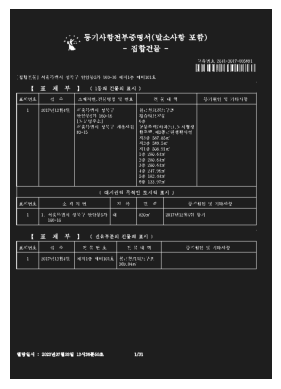

In [5]:
imgRGB = cv2.cvtColor(img_bin, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imgRGB) 
plt.show()

In [6]:
### selecting min size as 15 pixels
line_min_width = 15
kernal_h = np.ones((1,line_min_width), np.uint8)
kernal_v = np.ones((line_min_width,1), np.uint8)

In [7]:
# Horizontal Kernel, Vertical Kernel
img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

# MIX Kernel
img_bin_final=img_bin_h|img_bin_v

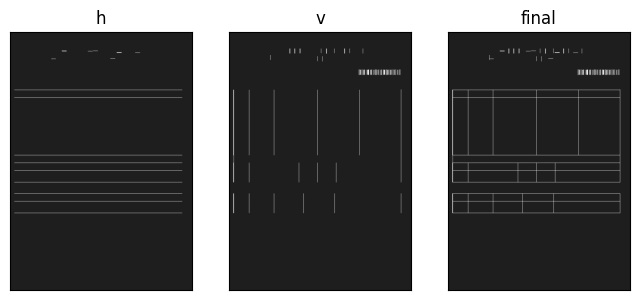

In [8]:
imgRGB = cv2.cvtColor(img_bin_h, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(img_bin_v, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(img_bin_final, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,5))
plt.subplot(1, 3, 1), plt.imshow(imgRGB)
plt.title('h')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(imgRGB2)
plt.title('v')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(imgRGB3)
plt.title('final')
plt.xticks([]), plt.yticks([])

plt.show()

In [9]:
final_kernel = np.ones((3,3), np.uint8)
img_bin_final=cv2.dilate(img_bin_final, final_kernel, iterations=1)

In [10]:
_, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

n1 = np.array(stats[2:])

In [11]:
for x,y,w,h,area in stats[2:]:
        # print(f"x: {x}, y: {y}, w: {w}, h: {h}, pixel: {area}, x+w: {x+w}, y+h: {y+h}")
        cv2.rectangle(image,(x,y), (x+w, y+h),(0,255,0), 2)

In [12]:
a = [i[0] for i in stats[2:]]
min_x = min(a)
b = [i[1] for i in stats[2:]]
min_y = min(b)

xw = n1[:, [0,2]].sum(axis=1).max()
yh = n1[:, [1,3]].sum(axis=1).max()
    
cv2.rectangle(image,(min_x, min_y),(xw, yh),(0,0,255), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

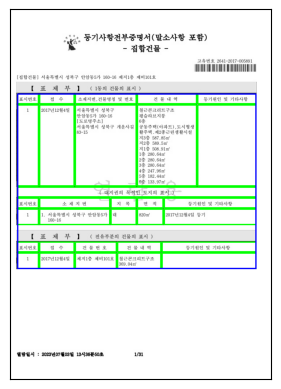

In [13]:
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
text = pytesseract.image_to_data(image, lang = 'kor', config='--psm 1') 

print(text)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	595	842	-1	
2	1	1	0	0	0	168	56	279	43	-1	
3	1	1	1	0	0	168	56	279	43	-1	
4	1	1	1	1	0	168	56	279	18	-1	
5	1	1	1	1	1	168	57	16	16	40.446587	둥
5	1	1	1	1	2	186	56	13	17	93.238495	기
5	1	1	1	1	3	202	56	17	17	93.294189	사
5	1	1	1	1	4	220	56	16	17	93.298042	항
5	1	1	1	1	5	237	56	14	17	93.302498	전
5	1	1	1	1	6	255	57	14	16	93.296761	부
5	1	1	1	1	7	272	57	14	16	90.234062	중
5	1	1	1	1	8	288	57	13	16	93.242561	명
5	1	1	1	1	9	305	56	13	18	93.305466	서
5	1	1	1	1	10	322	57	6	16	91.701157	(
5	1	1	1	1	11	330	56	16	16	93.252129	말
5	1	1	1	1	12	348	58	15	13	93.305252	소
5	1	1	1	1	13	365	56	15	18	93.304749	사
5	1	1	1	1	14	382	56	15	17	81.884155	항
5	1	1	1	1	15	406	56	41	18	93.269424	포
5	1	1	1	1	16	427	52	15	31	93.299500	함
5	1	1	1	1	17	441	52	10	31	70.480400	)
4	1	1	1	2	0	257	82	102	17	-1	
5	1	1	1	2	1	257	89	8	2	91.755875	-
5	1	1	1	2	2	275	82	14	17	93.245293	집
5	1	1	1	2	3	293	82	15	17	93.133736	합
5	1	1	1	2	4	313	82	11	16

In [ ]:
# 등기부 등본 내용 확인해보기
# 템플릿 이미지로 확인해서 표 아래, 중간, 위를 인식

# 특정 단어의 경우, 향후 문자 매핑 텍스트 유사도를 통해 매핑해서, 표의 기준이 되는 곳에서 찾아서 매핑하고, 내용을 추출 
# 인풋 값을 넣었을 때, 구조를 인식해서, 필요한 부분만 이미지 크랍해서, OCR 부분 수행으로 빠르다 

# 표 구조 인식이 표의 좌측 상단 값과 텍스트의 중앙 텍스트 값이 같음을 기준으로 같은 내용으로 인식

# 실제 상용화를 위해서는 문자의 경우, 회전이 중요한데, 글자의 회전 확인 추가로 확인해봐야 한다.
